In [1]:
import pandas as pd
from ReliefF import ReliefF as rlf
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
data_cat = pd.read_csv("/Users/louisedry/Desktop/IODAA/fil_rouge/git/fil_rouge/data_pretraitee/data_categorielle.csv", sep=";", index_col=0)

In [3]:
data_cat.columns

Index(['N2O', 'Date', 'Bande', 'CP', 'Peuplement', 'Travail_sol_J60',
       'soilH_h1', 'soilH_h2', 'Ajout_phyto_30J', 'Ajout_phyto_45J',
       'Ajout_phyto_60J', 'Ajout_ferti_30J', 'Ajout_ferti_45J',
       'Ajout_ferti_60J', 'N2O_J182', 'Temp_moyenne_5J', 'Sum_pluie_5J',
       'year', 'month', 'Temp_quali', 'Pluie_quali', 'Pluie_ON', 'Saison',
       'Pic_J182', 'soil_h1_quali', 'soil_h2_quali', 'N2O_quali'],
      dtype='object')

In [4]:
target = data_cat['Pic_J182']

In [5]:
data_cat.head()

,N2O,Date,Bande,CP,Peuplement,Travail_sol_J60,soilH_h1,soilH_h2,Ajout_phyto_30J,Ajout_phyto_45J,...,year,month,Temp_quali,Pluie_quali,Pluie_ON,Saison,Pic_J182,soil_h1_quali,soil_h2_quali,N2O_quali
0,18.537129,2018-03-14,acs,ble,ble,False,0.214182,0.197413,0.0,0.0,...,2018,3,moyenne,elevee,pluie,hiver,True,elevee,moyenne,elevee
1,2.088998,2018-03-14,pn,ble,ble,False,0.214570,0.224213,0.0,0.0,...,2018,3,moyenne,elevee,pluie,hiver,False,elevee,elevee,not_pic
2,1.488817,2018-03-14,bi,ble,ble,False,0.221340,0.222435,0.0,0.0,...,2018,3,moyenne,elevee,pluie,hiver,False,elevee,elevee,not_pic
3,1.390654,2018-03-14,bio,ble,ble,False,0.212602,0.214897,0.0,0.0,...,2018,3,moyenne,elevee,pluie,hiver,False,elevee,elevee,not_pic
4,3.297613,2018-03-14,elev,ble,ble,False,0.210646,0.202263,0.0,0.0,...,2018,3,moyenne,elevee,pluie,hiver,False,elevee,moyenne,not_pic


In [7]:
data_cat["Travail_sol_J60"] = data_cat["Travail_sol_J60"].astype("float64")

In [28]:
data_fullcat = data_cat.drop(["Pic_J182","N2O","soilH_h1","soilH_h2","N2O_J182","N2O_quali","Date"], axis=1)

In [25]:
data_fullcat.columns

Index(['Date', 'Bande', 'CP', 'Peuplement', 'Travail_sol_J60',
       'Ajout_phyto_30J', 'Ajout_phyto_45J', 'Ajout_phyto_60J',
       'Ajout_ferti_30J', 'Ajout_ferti_45J', 'Ajout_ferti_60J',
       'Temp_moyenne_5J', 'Sum_pluie_5J', 'year', 'month', 'Temp_quali',
       'Pluie_quali', 'Pluie_ON', 'Saison', 'soil_h1_quali', 'soil_h2_quali'],
      dtype='object')

#### Relief

In [53]:
dummy_data = pd.get_dummies(data_fullcat)

In [56]:
help(relief)

Help on module sklearn_relief:

NAME
    sklearn_relief

DESCRIPTION
    Relief family algorithm implementations.
    =====
    
       Copyright 2017 Alfredo Mungo <alfredo.mungo@protonmail.ch>
    
       Redistribution and use in source and binary forms, with or without
       modification, are permitted provided that the following conditions are met:
    
       1. Redistributions of source code must retain the above copyright notice,
       this list of conditions and the following disclaimer.
    
       2. Redistributions in binary form must reproduce the above copyright notice,
       this list of conditions and the following disclaimer in the documentation
       and/or other materials provided with the distribution.
    
       3. Neither the name of the copyright holder nor the names of its
       contributors may be used to endorse or promote products derived from this
       software without specific prior written permission.
    
       THIS SOFTWARE IS PROVIDED BY THE CO

In [62]:
test = dummy_data.drop(["Temp_moyenne_5J","Sum_pluie_5J"], axis=1)

In [63]:
import sklearn_relief as relief

rlf = relief.Relief(n_features=5)

new_data = rlf.fit_transform(test, target)

KeyError: 296

SFS

In [32]:
dummy_data

,Travail_sol_J60,Ajout_phyto_30J,Ajout_phyto_45J,Ajout_phyto_60J,Ajout_ferti_30J,Ajout_ferti_45J,Ajout_ferti_60J,Temp_moyenne_5J,Sum_pluie_5J,year,...,Saison_automne,Saison_ete,Saison_hiver,Saison_printemps,soil_h1_quali_basse,soil_h1_quali_elevee,soil_h1_quali_moyenne,soil_h2_quali_basse,soil_h2_quali_elevee,soil_h2_quali_moyenne
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.54,28.0,2018,...,0,0,1,0,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.54,28.0,2018,...,0,0,1,0,0,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.54,28.0,2018,...,0,0,1,0,0,1,0,0,1,0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.54,28.0,2018,...,0,0,1,0,0,1,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.54,28.0,2018,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.00,9.0,2021,...,0,1,0,0,1,0,0,0,0,1
369,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.70,12.0,2019,...,0,1,0,0,0,0,1,0,0,1
370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.70,12.0,2019,...,0,1,0,0,0,0,1,0,0,1
371,1.0,1.0,1.0,1.0,0.0,0.0,0.0,15.26,0.0,2019,...,0,1,0,0,1,0,0,0,0,1


In [37]:
rf = RandomForestClassifier(n_estimators=200)
sfs_f = SequentialFeatureSelector(rf, n_features_to_select=5, direction = "forward")

sfs_f.fit(dummy_data, target)
dummy_data.loc[:,sfs_f.get_support()]

,month,Peuplement_repousse_de_colza,Peuplement_triticale,Temp_quali_elevee,soil_h2_quali_elevee
0,3,0,0,0,0
1,3,0,0,0,1
2,3,0,0,0,1
3,3,0,0,0,1
4,3,0,0,0,0
...,...,...,...,...,...
368,7,0,0,1,0
369,8,0,0,1,0
370,8,0,0,1,0
371,9,0,0,0,0


In [38]:
sfs_b = SequentialFeatureSelector(rf, n_features_to_select=5, direction = "backward")

sfs_b.fit(dummy_data, target)
dummy_data.loc[:,sfs_b.get_support()]

,Ajout_phyto_60J,Ajout_ferti_45J,Temp_moyenne_5J,month,Bande_bi
0,0.0,1.0,10.54,3,0
1,0.0,1.0,10.54,3,0
2,0.0,0.0,10.54,3,1
3,0.0,1.0,10.54,3,0
4,0.0,0.0,10.54,3,0
...,...,...,...,...,...
368,1.0,0.0,18.00,7,0
369,0.0,0.0,19.70,8,0
370,0.0,0.0,19.70,8,0
371,1.0,0.0,15.26,9,0


RFE

In [64]:
from sklearn.feature_selection import RFE

rfe = RFE(rf, n_features_to_select=5)

rfe.fit_transform(dummy_data, target)

array([[1.000e+00, 1.054e+01, 2.800e+01, 2.018e+03, 3.000e+00],
       [1.000e+00, 1.054e+01, 2.800e+01, 2.018e+03, 3.000e+00],
       [0.000e+00, 1.054e+01, 2.800e+01, 2.018e+03, 3.000e+00],
       ...,
       [0.000e+00, 1.970e+01, 1.200e+01, 2.019e+03, 8.000e+00],
       [0.000e+00, 1.526e+01, 0.000e+00, 2.019e+03, 9.000e+00],
       [0.000e+00, 1.542e+01, 0.000e+00, 2.019e+03, 9.000e+00]])

In [66]:
dummy_data.loc[:,rfe.get_support()]

,Ajout_ferti_30J,Temp_moyenne_5J,Sum_pluie_5J,year,month
0,1.0,10.54,28.0,2018,3
1,1.0,10.54,28.0,2018,3
2,0.0,10.54,28.0,2018,3
3,1.0,10.54,28.0,2018,3
4,0.0,10.54,28.0,2018,3
...,...,...,...,...,...
368,0.0,18.00,9.0,2021,7
369,0.0,19.70,12.0,2019,8
370,0.0,19.70,12.0,2019,8
371,0.0,15.26,0.0,2019,9


<BarContainer object of 54 artists>

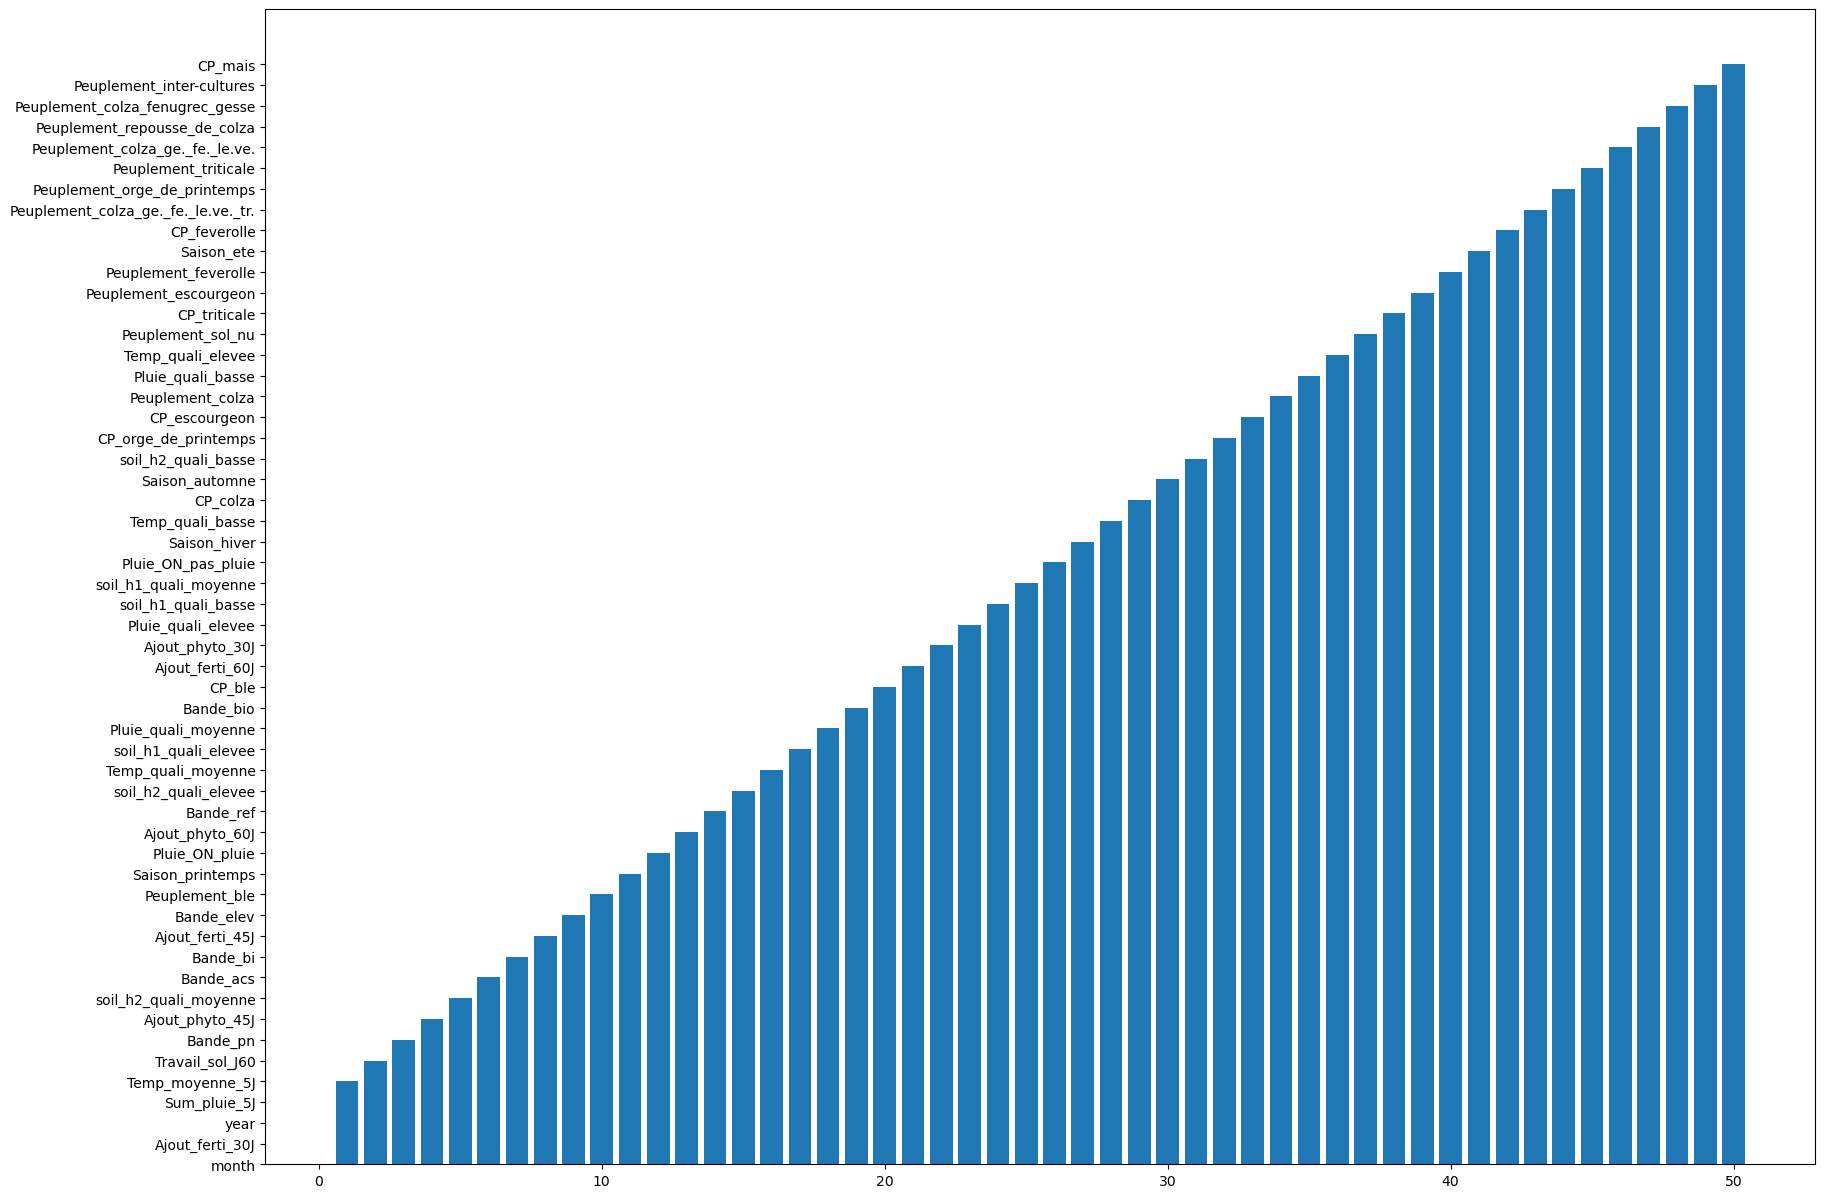

In [81]:
import matplotlib.pyplot as plt

rfe_ranking = pd.DataFrame({"features":dummy_data.columns, "rank":rfe.ranking_})
rfe_ranking = rfe_ranking.sort_values("rank")

plt.figure(figsize=(20,15))
plt.bar(rfe_ranking["rank"], rfe_ranking["features"])

In [82]:
rfe_ranking.to_csv("rfe_feature_selection.csv", sep=";")

XGBoost avec feature importance

<AxesSubplot: >

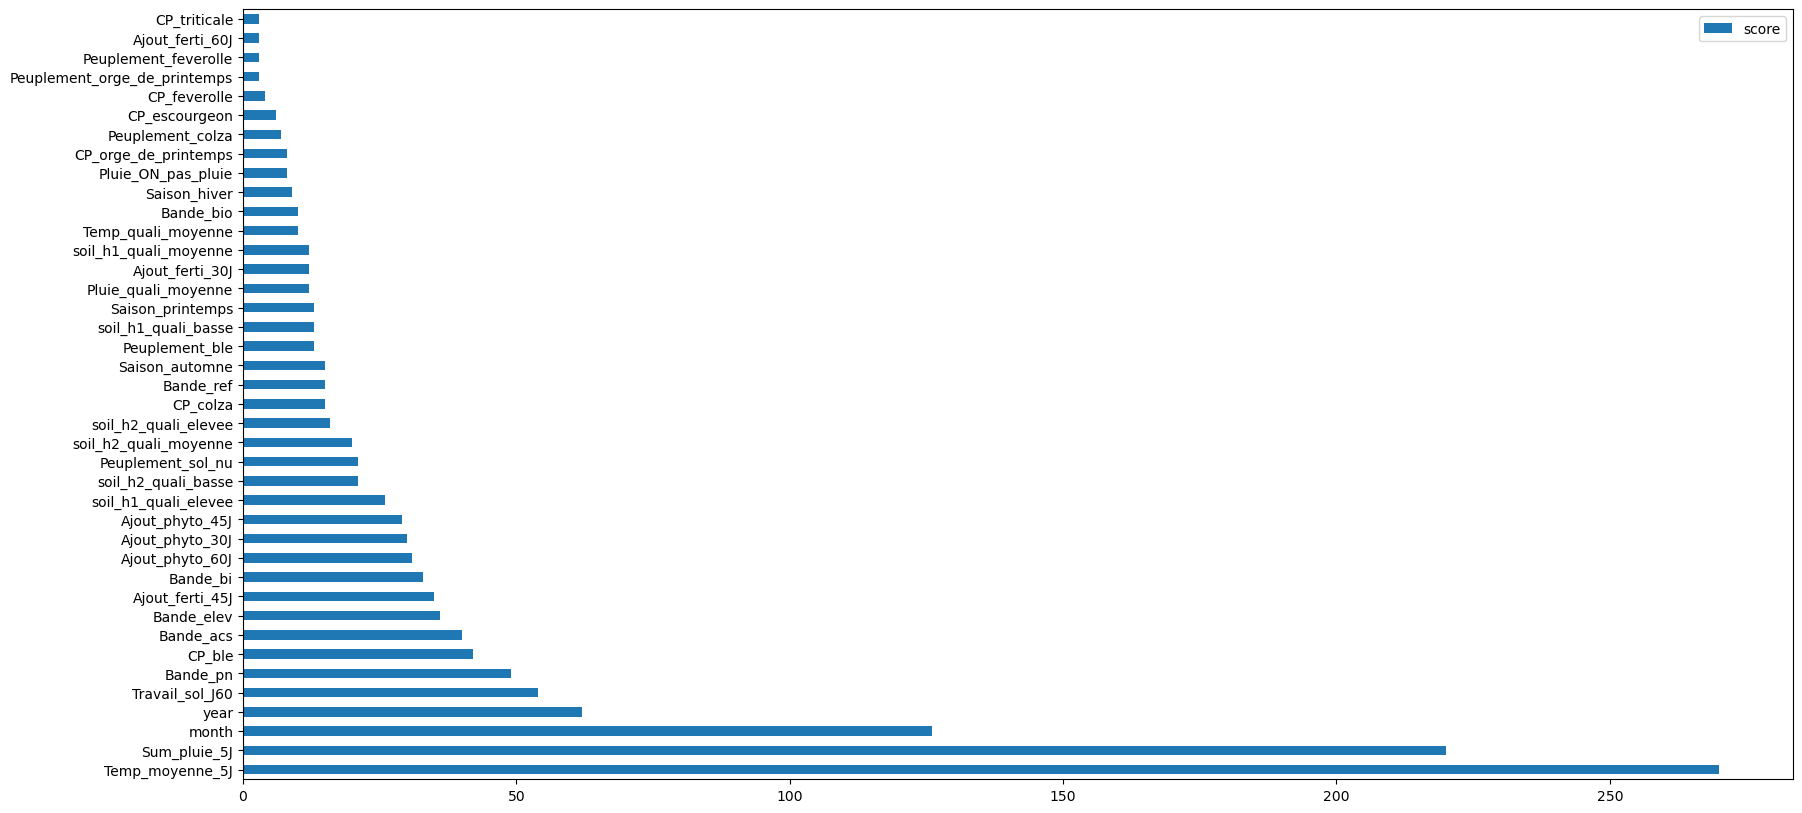

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(dummy_data, target)
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [47]:
xgboost_fs = pd.DataFrame({"feature":keys, "weight":values}, index=[i for i in range(len(values))])

In [50]:
xgboost_fs.to_csv("xgboost_features_selected.csv", sep=";")